# Assignment on Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading the dataset into python environment

In [2]:
data=pd.read_csv("C:/Users/vaio/Downloads/titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Making ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. Checking the basic details of the dataset

In [5]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Filling all the missing values present in all the columns in the dataset

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Filling missing values in the column Age

data['Age']=data['Age'].fillna(data['Age'].median())

In [11]:
# Filling missing values in columns Cabin and Embarked

for i in['Cabin','Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])


In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset


### Column 'Fare'

Text(0.5, 1.0, 'Boxplot of Fare')

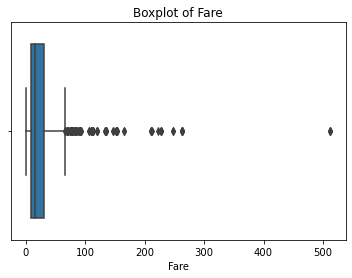

In [14]:
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare')

In [15]:
# Handling outliers using IQR

Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
uppl=Q3+1.5*IQR
lowl=Q1-1.5*IQR
print(uppl)
print(lowl)



65.6344
-26.724


In [16]:
#Getting the outliers
outliers = []
for x in data['Fare']:
    if (x>uppl) or (x<lowl):
        outliers.append(x)
print('No of outliers in the Fare column :',len(outliers),'\n')
print('The outlier values are: ',outliers)

No of outliers in the Fare column : 116 

The outlier values are:  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [17]:
#Droping outliers
data.drop(data[(data['Fare']>uppl)|(data['Fare']<lowl)].index,inplace=True)

### Column 'Age'

Text(0.5, 1.0, 'Boxplot of Age')

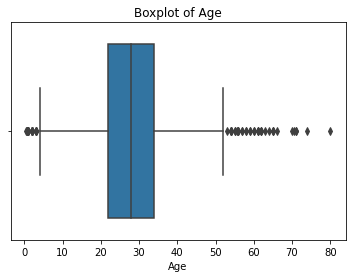

In [18]:
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')

In [19]:
# Handling outliers using IQR

Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
uppl=Q3+1.5*IQR
lowl=Q1-1.5*IQR
print(uppl)
print(lowl)

52.0
4.0


In [20]:
#Getting the outliers
outliers = []
for x in data['Age']:
    if (x>uppl) or (x<lowl):
        outliers.append(x)
print('No of outliers in the Age column :',len(outliers),'\n')
print('The outlier values are: ',outliers)

No of outliers in the Age column : 67 

The outlier values are:  [54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [21]:
#Droping outliers
data.drop(data[(data['Age']>uppl)|(data['Age']<lowl)].index,inplace=True)

### Column 'SibSp'

Text(0.5, 1.0, 'Boxplot of sibsp')

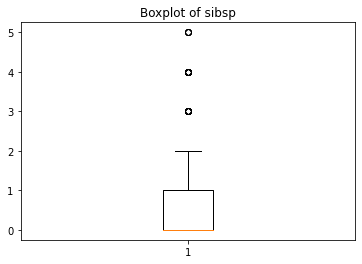

In [22]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of sibsp')

In [23]:
# Handling outliers using IQR

Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
uppl=Q3+1.5*IQR
lowl=Q1-1.5*IQR
print(uppl)
print(lowl)

2.5
-1.5


In [24]:
#Getting the outliers
outliers = []
for x in data['SibSp']:
    if (x>uppl) or (x<lowl):
        outliers.append(x)
print('No of outliers in the SibSp column :',len(outliers),'\n')
print('The outlier values are: ',outliers)

No of outliers in the SibSp column : 27 

The outlier values are:  [3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 4, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 4]


In [25]:
#Droping outliers
data.drop(data[(data['SibSp']>uppl)|(data['SibSp']<lowl)].index,inplace=True)

In [26]:
data.shape

(681, 12)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

##### Survived is the target column and the rest except the columns name and ticket can be selected as feature set(the columns are avoided since they doesn't give any meaning to the model)

In [27]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
x=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y=data['Survived']

In [29]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,B96 B98,S
2,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,B96 B98,S
5,3,male,28.0,0,0,8.4583,B96 B98,Q


In [30]:
x.shape

(681, 8)

In [31]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2.500734,28.616740,0.265786,0.268722,16.590772
std,0.721772,9.077604,0.495410,0.753252,13.260513
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.250000
max,3.000000,52.000000,2.000000,6.000000,65.000000


##### Min max scaling is done only on fare and age columns since all columns except age and fare are categorical values.

In [32]:
from sklearn import  preprocessing 
min_max = preprocessing.MinMaxScaler(feature_range=(0,1)) 

In [33]:
x1=data[['Age','Fare']]
x1=min_max.fit_transform(x1)

In [34]:
x1=pd.DataFrame(x1,columns=['Age','Fare'])

In [35]:
x1.describe()

,Age,Fare
count,681.000000,681.000000
mean,0.512849,0.255243
std,0.189117,0.204008
min,0.000000,0.000000
25%,0.395833,0.120834
50%,0.500000,0.161538
75%,0.604167,0.357692
max,1.000000,1.000000


In [36]:
x.drop(data[['Age','Fare']],axis=1,inplace=True)

C:\Users\vaio\AppData\Local\Temp\ipykernel_7212\698746623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(data[['Age','Fare']],axis=1,inplace=True)


In [37]:
x=pd.concat([x,x1],axis=1)

In [38]:
x.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age,Fare
0,3.0,male,1.0,0.0,B96 B98,S,0.375000,0.111538
2,3.0,female,0.0,0.0,B96 B98,S,0.645833,0.816923
3,1.0,female,1.0,0.0,C123,S,0.645833,0.123846
4,3.0,male,0.0,0.0,B96 B98,S,0.500000,0.130128
5,3.0,male,0.0,0.0,B96 B98,Q,0.479167,0.171282
